#### Simple Linear Regression

** Step 01: ** GOAL: To predict student marks for math. 

** Step 02: ** Data Analysis

In [23]:
import pandas as pd
import numpy as np 

In [24]:
#1. Dataset Loading 
df = pd.read_csv('student_math.csv')

In [25]:
df.head()

,study_hours,math_marks
0,1.0,35
1,1.2,37
2,1.5,40
3,1.7,38
4,2.0,42


In [26]:
#2. Data Visualization
import matplotlib.pyplot as plt 
%matplotlib inline


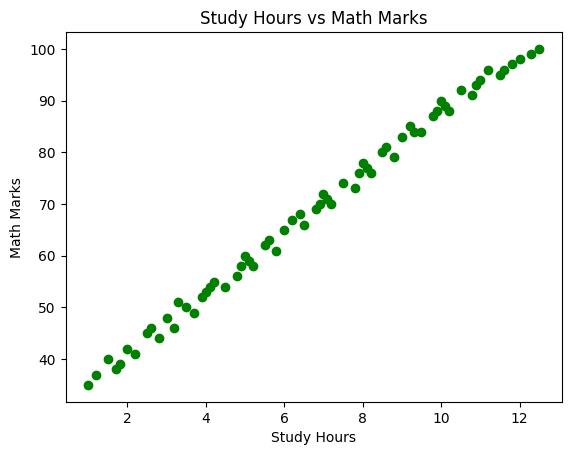

In [30]:
plt.scatter(x = df['study_hours'], y = df['math_marks'], color = 'green') 
plt.xlabel('Study Hours')
plt.ylabel('Math Marks')
plt.title('Study Hours vs Math Marks') 
plt.show()

In [28]:
#3. Checking Missing Values
df.isnull().sum()

study_hours    0
math_marks     0
dtype: int64

** Step 03: ** Feature Engineering

In [34]:
#1. Feature Selection
X = df[['study_hours']] # features should be in Dataframe or 2D array
y = df['math_marks'] # target can be in Series or 1D array

In [37]:
X.head()

,study_hours
0,1.0
1,1.2
2,1.5
3,1.7
4,2.0


In [38]:
y.head()

0    35
1    37
2    40
3    38
4    42
Name: math_marks, dtype: int64

In [39]:
#2. Train Test Split 
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [46]:
#3. Scaling (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

** Step 04:** Model Training

In [48]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(n_jobs=-1) 
model.fit(X_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [49]:
model.coef_, model.intercept_

(array([18.53622155]), np.float64(69.21153846153847))

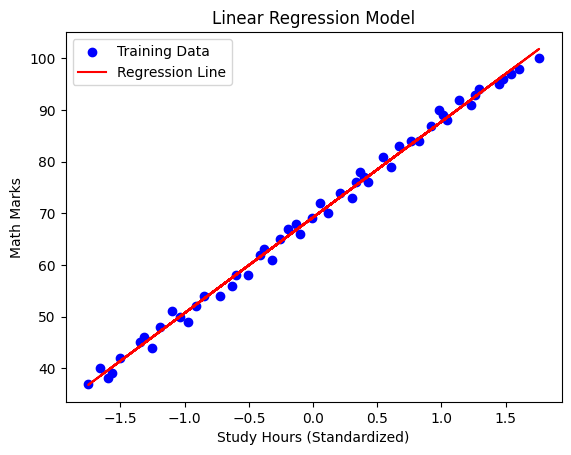

In [55]:
#2. Model Visualization

plt.scatter(x = X_train, y= y_train, color = 'blue', label = 'Training Data')
plt.plot(X_train, model.predict(X_train), color = 'red', label = 'Regression Line')

plt.xlabel('Study Hours (Standardized)')
plt.ylabel('Math Marks')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


** Step 05: ** Model Evaluation

In [58]:
# 5.1 Test data prediction
y_pred = model.predict(X_test) 


In [64]:
X_test

array([[ 0.08247566],
       [-0.53908006],
       [-1.8132693 ],
       [ 1.69852055],
       [-1.44033587],
       [ 0.02032009],
       [-0.57015785],
       [-0.88093571],
       [ 0.95265368],
       [ 0.51756467],
       [ 0.73510918],
       [-1.129558  ],
       [ 1.3566649 ],
       [-0.81878014]])

In [59]:
y_test.values

array([71, 59, 35, 99, 41, 70, 60, 53, 88, 80, 85, 46, 96, 55])

In [60]:
y_pred

array([ 70.74032564,  59.21903097,  35.6003769 , 100.69569177,
        42.5131537 ,  69.58819617,  58.64296624,  52.8823189 ,
        86.87013817,  78.80523191,  82.83768504,  48.27380104,
        94.35897971,  54.03444837])

In [65]:
#5.2 Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae, mse, rmse

(1.110126016982829, 1.7029219706087868, np.float64(1.304960524540412))

In [66]:
#5.3 Model Performance Evaluation

from sklearn.metrics import r2_score 
r2 = r2_score(y_test, y_pred)
r2

0.9955996848304682

In [76]:
pred_Y = model.predict(scaler.transform([[24]])) 

/home/sib/04. REC--Machine-Learning-for-Robotics/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
pred_Y

array([168.09526558])